# Importing Libraries 

In [43]:
import pandas as pd
import numpy as np

In [44]:
data = pd.read_csv('/content/drive/MyDrive/data/data1.txt')

In [45]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,9.37,9.62,9.30,9.52,377903,0
1,2005-02-28,9.40,9.64,9.29,9.31,312028,0
2,2005-03-01,9.40,9.51,9.10,9.40,384273,0
3,2005-03-02,9.33,9.44,9.07,9.35,652132,0
4,2005-03-03,9.35,9.57,9.30,9.49,349153,0


In [46]:
print("Data Shape -->", data.shape)

Data Shape --> (3201, 7)


In [47]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3201.0
mean,21.518920,21.888162,21.138364,21.530935,4.421042e+05,0.0
std,16.123405,16.296836,15.917826,16.136642,3.206984e+05,0.0
min,5.580000,5.800000,5.360000,5.490000,4.659400e+04,0.0
25%,12.530000,12.850000,12.250000,12.530000,2.629530e+05,0.0
50%,15.500000,15.870000,15.170000,15.530000,3.666640e+05,0.0
75%,24.030000,24.440000,23.540000,24.030000,5.185050e+05,0.0
max,94.310000,95.000000,92.000000,94.250000,6.738213e+06,0.0


In [48]:
print("Do you have a null column? \n", data.isna().sum())

Do you have a null column? 
 Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64


In [49]:
training_size = int(len(data)*0.80)
data_len = len(data)

train, test = data[0:training_size],data[training_size:data_len]

In [50]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  2560
total length of data -->  3201
Train length -->  2560
Test length -->  641


In [51]:
# the part of data that we will use as training.
train = train.loc[:, ["Open"]].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [52]:
end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [53]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)

X_train -->  (2520, 40, 1)
y_train shape -->  (2520,)


In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [55]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [56]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [57]:
epochs = 100 
batch_size = 20

In [58]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
126/126 [==============================] - 5s 26ms/step - loss: 0.2922
Epoch 2/100
126/126 [==============================] - 3s 26ms/step - loss: 0.1364
Epoch 3/100
126/126 [==============================] - 3s 26ms/step - loss: 0.0606
Epoch 4/100
126/126 [==============================] - 3s 26ms/step - loss: 0.0419
Epoch 5/100
126/126 [==============================] - 3s 26ms/step - loss: 0.0281
Epoch 6/100
126/126 [==============================] - 3s 26ms/step - loss: 0.0199
Epoch 7/100
126/126 [==============================] - 3s 26ms/step - loss: 0.0152
Epoch 8/100
126/126 [==============================] - 3s 26ms/step - loss: 0.0121
Epoch 9/100
126/126 [==============================] - 3s 26ms/step - loss: 0.0098
Epoch 10/100
126/126 [==============================] - 3s 26ms/step - loss: 0.0084
Epoch 11/100
126/126 [==============================] - 3s 26ms/step - loss: 0.0075
Epoch 12/100
126/126 [==============================] - 3s 26ms/step - loss: 0.0066
E

In [59]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
2560,2015-04-30,24.81,24.980,24.13,24.46,297500,0
2561,2015-05-01,24.60,25.570,24.60,25.47,245100,0
2562,2015-05-04,25.59,25.650,24.79,24.89,307600,0
2563,2015-05-05,25.84,25.840,23.67,24.57,527600,0
2564,2015-05-06,24.58,24.848,24.02,24.31,230425,0


In [60]:
real_price = test.loc[:, ["Open"]].values
print("Real Price Shape --> ", real_price.shape)

Real Price Shape -->  (641, 1)


In [61]:
dataset_total = pd.concat((data["Open"], test["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)

In [62]:
X_test = []

for i in range(timesteps, 412):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

print("X_test shape --> ", X_test.shape)

X_test shape -->  (372, 40)


In [63]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test = np.asarray(X_test).astype(np.float32)
predict = regressor.predict(X_test)
predict = scaler.inverse_transform(predict)

In [64]:
import matplotlib.pyplot as plt

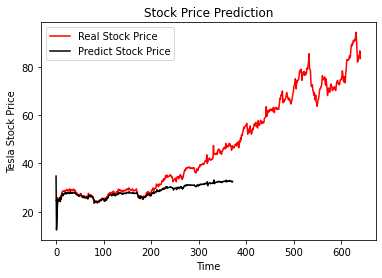

In [65]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()